In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d as interpolate
from scipy.integrate import quad

In [2]:
'''
Disc1 - Low Z
Disc2 - High Z
Disc3 - Bulge
'''

scale1 = 0.3
scale2 = 0.95
scale3 = 0.2
weight1 = 2.6/6.1
weight2 = 2.6/6.1
weight3 = 0.9/6.1
z_min = -7.
z_max = 7.

z = np.linspace(z_min, z_max, 500)

In [3]:
def p1(z):
    norm1 = (2*scale1*(1 - np.e**(z_min/scale1)))**(-1)
    return norm1*np.e**(-np.abs(z)/scale1)
def p2(z):
    norm2 = (2*scale2*(1 - np.e**(z_min/scale2)))**(-1)
    return norm2*np.e**(-np.abs(z)/scale2)
def p3(z):
    norm3 = (2*scale3*(1 - np.e**(z_min/scale3)))**(-1)
    return norm3*np.e**(-np.abs(z)/scale3)
def p(z):
    return weight1*p1(z) + weight2*p2(z) + weight3*p3(z)

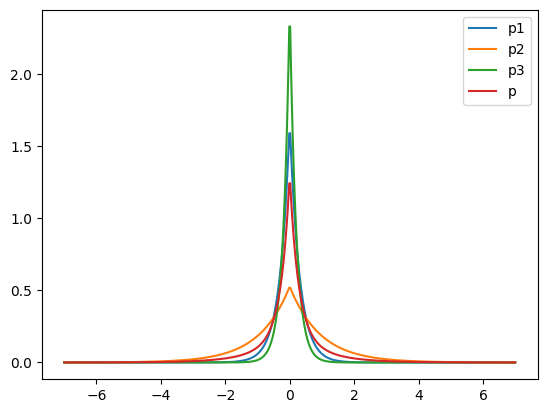

In [4]:
plt.plot(z, p1(z), label = 'p1')
plt.plot(z, p2(z), label = 'p2')
plt.plot(z, p3(z), label = 'p3')
plt.plot(z, p(z), label = 'p')
plt.legend()

In [5]:
def c(z):
    return quad(p, z_min, z)[0]
c = np.vectorize(c)

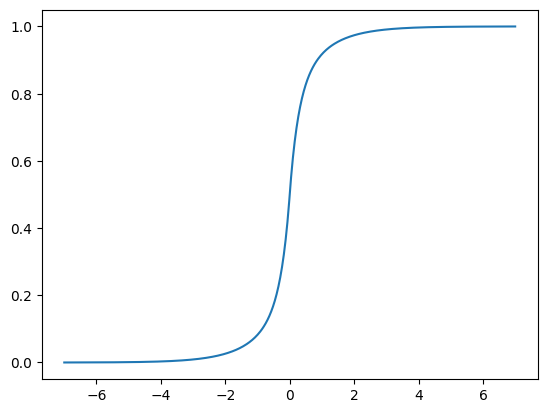

In [6]:
plt.plot(z, c(z))

In [7]:
def inv_cdf(value):
    interp_inv_cdf = interpolate(c(z),z)
    return interp_inv_cdf(value)

(array([  3.,   4.,  13.,  48., 244., 142.,  32.,   9.,   4.,   1.]),
 array([-3.82130164, -3.03552502, -2.2497484 , -1.46397179, -0.67819517,
         0.10758145,  0.89335807,  1.67913469,  2.46491131,  3.25068793,
         4.03646454]),
 <BarContainer object of 10 artists>)

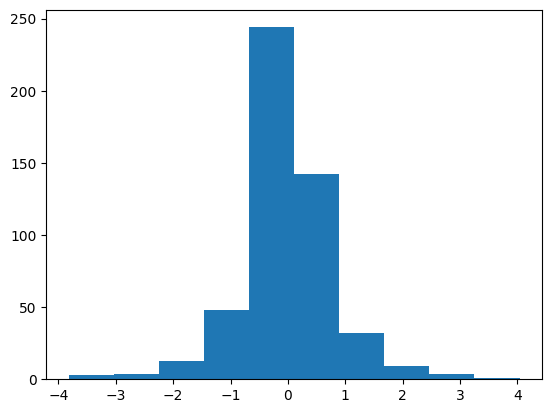

In [11]:
values = np.random.uniform(0,1,500)
plt.hist(inv_cdf(values))